<a href="https://colab.research.google.com/github/raphatrivium/Python-Introduction/blob/main/projeto_Bethe_Bloch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interacão da radiação com a matéria através da equação de Bethe-Bloch**

#  Grupo: Leon Luis Silva de Abreu, Raphael Gomes de Souza, Tais Dias Izidoro 

O projeto consiste em calcular a distribuiçao diferencial da energia de um múon passando pelo cobre e integrar aequacao para obter a perda total de energia porionizacao.Inicialmente ser ́a explorada a relacao entre $\beta^3$, $\gamma^4$ e $\beta \gamma$, onde as partıculas carregadas irão variar de fracamente relativísticas ($\beta= 0,1$) a ultra-relativísticas ($\gamma= 100$).  Em seguida, a equação de Bethe-Bloch ser ́a construída um pedaço de cada vez.

$-\frac{dE}{dx} = K z^2 \rho \frac{Z}{A} \frac{1}{\beta^2}[ln (\frac{2 m_e c^2 \beta^2 \gamma^2}{I}) - \beta^2 ] $

(1)  Escreva uma função em Python chamada de f_gamma(beta):que tenha como argumento $\beta$ e retorna $\gamma$. Teste-o para um valor de $\beta$, como por exemplo, 0,6. Certifique-se de que sua função gama(beta) possa aceitar um vetor de $\beta$ e retornar um vetor compatível de $\gamma$.

In [10]:
import math

def beta_fucntion(v):
  c = 300000000 #m/s
  return v/c

def gamma( entry, e_type='beta' ):
  gamma = []
  if e_type == 'beta': #input de varaivel beta
    for i in range( len(entry) ):
      beta = entry[i]  
      gamma.append(  1 / ( math.sqrt(1-beta**2) ) )
  elif e_type == 'velocidade': # input de velocidade
    for i in range( len(entry) ):
      beta = beta_fucntion( entry[i] ) 
      gamma.append(  1 / math.sqrt( 1 - beta**2 )  )
  else:
    raise ValueError("Entry must be 'beta' or 'velocidade'.")   
  return gamma
  
a = [0.6,0.7]
gamma( a ) #teste

[1.25, 1.4002800840280099]

A partir de um vetor de valores $\beta$ variando de 0 a 0,995, faça um gráfico $\gamma \times \beta$.

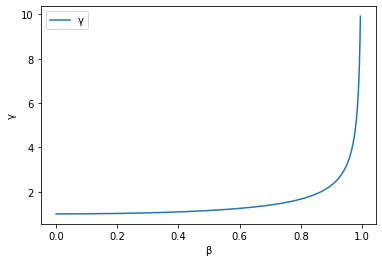

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def gamma_versus_beta(x0,xf,dx):
  x = np.arange( x0, xf, dx)
  a = gamma(x)
  plt.plot( x, a, label='\u03B3')
  plt.xlabel("\u03B2") ; plt.ylabel("\u03B3") ; plt.legend()

gamma_versus_beta(0,0.995,0.0001)

Faça um gráfico $\gamma \beta \times \beta $.  O que você observa?

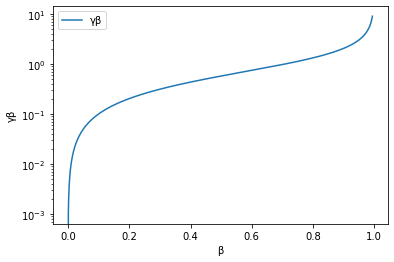

In [12]:
def gammabeta_versus_beta(x0,xf,dx):
  Beta = np.arange( x0, xf, dx)
  Gamma = gamma(Beta)
  GammaBeta = [a*b for a,b in zip(Gamma,Beta)] #multiplica as duas listas
  plt.plot(Beta, GammaBeta, label='\u03B3\u03B2')
  plt.xlabel('\u03B2') ; plt.ylabel('\u03B3\u03B2') ; plt.legend()
  plt.semilogy()

gammabeta_versus_beta(0,0.995,0.001)

Trace o argumento do log natural na equacao de Bethe-Block em  uma função de $\gamma \beta$. Faça o argumento ser uma nova função lnargument(). Para você: essa função deve aceitar $\beta$ ou $\gamma$ como um argumento, ou ambos, ou seu produto? 
Observe que pode ser muito difícil obter $\beta$ com uma boa precisão a partirem baixas velocidades; o oposto é difícil em velocidades muito altas. Faça o gráfico para um intervalo de 0,1 a 100.


$-\frac{dE}{dx} = K z^2 \rho \frac{Z}{A} \frac{1}{\beta^2}[ln (\frac{2 m_e c^2 \beta^2 \gamma^2}{I}) - \beta^2 ] $

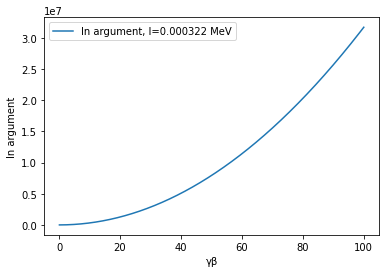

In [13]:
def ln_argument(betagamma, I):
  mec2 = 0.5110 #MeV - Massa do elétron  me*c^2
  a = 2 * mec2 * (betagamma )**2
  y = a/I   #np.log(x) is the Natural Log (base e log) of x
  return y

def ln_versus_gammabeta(gb0, gbf, dgb, I):
  BetaGamma = np.arange( gb0, gbf, dgb)
  Argument = ln_argument( BetaGamma, I)
  plt.plot(BetaGamma, Argument, label='ln argument, I=%s MeV' % I )
  plt.xlabel("\u03B3\u03B2") ; plt.ylabel("ln argument") ; plt.legend()

#O valor de I= 3.22 10^-6 MeV ( Mean excitation energy) usado foi retirado na página PDG do cobre
ln_versus_gammabeta(0.1, 100, 0.01, 0.000322)

Esse gráfico não mostra a região de interesse para valores baixos de $\beta$. Faça o plot com uma escala logarítimica no eixo vertical  
Dica: Procure na ajuda do matplotlib afunção semilogy(). Ficou melhor? Talvez ambos os eixos?

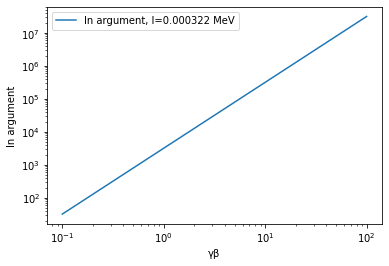

In [14]:
def ln_versus_gammabeta(gb0, gbf, dgb, I):
  BetaGamma = np.arange( gb0, gbf, dgb)
  Argument = ln_argument( BetaGamma, I)
  plt.plot(BetaGamma, Argument, label='ln argument, I=%s MeV' % I )
  plt.xlabel("\u03B3\u03B2") ; plt.ylabel("ln argument") ; plt.legend()
  plt.semilogy() ;  plt.semilogx()

ln_versus_gammabeta(0.1, 100, 0.01, 0.000322) #Usei I=10 apenas para teste

Provável que agora, seus valores $\gamma \beta$ não estão  uniformemente espaçados no gráfico. Faça um vetor de valores $\gamma \beta$ que tenham um logaritmo uniformemente espaçado de 0,1 a 100. Repita o gráfico mais uma vez usando os novos argumentos. Uma identidade útil aqui é $\gamma^2= (\gamma \beta)^2+ 1$

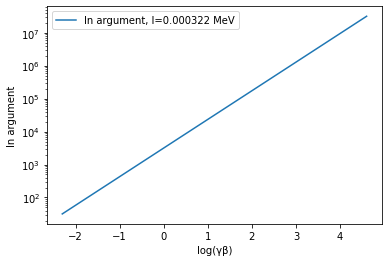

In [15]:
def ln_versus_gammabeta(gb0, gbf, dgb, I):
  BetaGamma = np.arange( gb0, gbf, dgb)
  Argument = ln_argument( BetaGamma, I) 
  plt.plot( np.log(BetaGamma), Argument, label='ln argument, I=%s MeV' % I )
  plt.xlabel("log(\u03B3\u03B2)") ; plt.ylabel("ln argument") ; plt.legend()
  plt.semilogy() ;

ln_versus_gammabeta(0.1, 100, 0.01, 0.000322) #Usei I=10 apenas para teste

Plote o conteúdo dos colchetes $\times \gamma\beta$ usando o mesmo espaçamento do vetor de log para o argumento x. Esse é um número adimensional que pode variar de 3,55 a maisde 16. Para termos números reais de I, escolha múons que penetram em um absorvedor de cobre. 

$[ln (\frac{2 m_e c^2 \beta^2 \gamma^2}{I}) - \beta^2 ]$

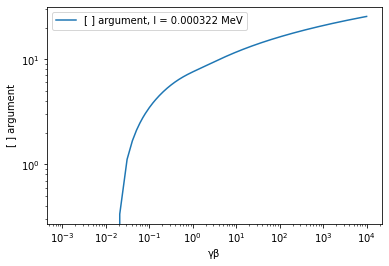

In [16]:
#Como nossa entrada é betagamma, é necessário, usando a identidade 
# mencionada anteriormanete fazer funções que nos retorne valor de beta
def betagamma_gamma(betagamma): #usando a identidade
  gamma = (betagamma**2 + 1 )**(1/2)
  return gamma
def gamma_beta(gamma):
  beta = ( (gamma**2 -1)**(1/2) ) / gamma
  return beta
def betagamma_beta(betagamma):
  gamma = betagamma_gamma(betagamma)  
  beta = gamma_beta(gamma)
  return beta

def colchetes( betagamma, I): 
  Argument = ln_argument( betagamma, I)  
  lnArgument = np.log( Argument ) # np.log(x) is the Natural Log (base e log) of x
  beta = betagamma_beta(betagamma)
  y = lnArgument - beta**2
  return y

def colchetes_versus_gammabeta(gb0, gbf, dgb, I):
  BetaGamma = np.arange( gb0, gbf, dgb)
  Colchetes = colchetes( BetaGamma, I)
  plt.plot( BetaGamma, Colchetes, label='[ ] argument, I = %s MeV' % I )
  plt.xlabel("\u03B3\u03B2") ; plt.ylabel("[ ] argument") ; plt.legend()
  plt.semilogy() ; plt.semilogx() ;

colchetes_versus_gammabeta(0.001, 10000, 0.01, 0.000322)

Finalmente, plote toda a equação -(dE/dx), a energia perdida por unidade de distância, para múons que passam pelo cobre. Os dados sobre o cobre estão todos no PDG: https://pdg.lbl.gov/2020/AtomicNuclearProperties/HTML/copper_Cu.html 

Convertendo paran ossas unidades, a perda de energia deve ter uma largura mínima de 13 MeV/cm para o momento do múon ou energia em torno de 300 MeV.

$-\frac{dE}{dx} = K z^2 \rho \frac{Z}{A} \frac{1}{\beta^2}[ln (\frac{2 m_e c^2 \beta^2 \gamma^2}{I}) - \beta^2 ] $

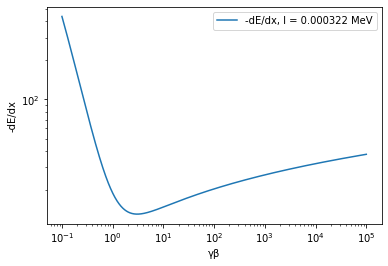

In [18]:
def lost_energy(betagamma, I):
  K = 0.307 #[MeV.cm2.mol−1]
  z = 1 # Carga da Partícula incididente - adimensional (e)
  rho = 8.960 # Densidade do meio - [g.cm-3]
  Z = 29 # N ́umero atômico do meio - adimensional (e)
  A = 63.546 # N ́umero de massa do meio - [g.mol-1]
  Colchetes = colchetes( betagamma, I)
  beta = betagamma_beta(betagamma)
  dEdx = K * (z**2) * rho * (Z/A) * ( beta**(-2) ) * Colchetes
  return dEdx

def LostEnergy(gb0, gbf, dgb, I):
  BetaGamma = np.arange( gb0, gbf, dgb)
  Lost_Energy = lost_energy( BetaGamma, I)
  plt.plot( BetaGamma, Lost_Energy, label= '-dE/dx, I = %s MeV' % I )
  plt.xlabel("\u03B3\u03B2") ; plt.ylabel("-dE/dx") ; plt.legend()
  plt.semilogy(); plt.semilogx();

LostEnergy(0.1, 100000, 0.01, 0.000322)

https://pdg.lbl.gov/2009/reviews/rpp2009-rev-passage-particles-matter.pdf

http://physics.princeton.edu/~phy209/week2/bethe_formula.pdf